In [1]:
!pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable


In [1]:
!pip install keras 

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install yfinance


Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [7]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [8]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.13.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp310-cp310-win_amd64.whl (276.5 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [10]:
start ='2000-01-01'
end='2022-12-31'

df = yf.download('RELIANCE.NS',start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2000-01-03  36.747459  38.944569  36.747459  38.944569  29.684196   28802010
2000-01-04  39.981236  42.062302  38.882679  42.062302  32.060589   61320457
2000-01-05  39.710464  44.545658  39.710464  43.710136  33.316597  173426953
2000-01-06  44.715855  46.526150  44.715855  45.543640  34.714119  101355113
2000-01-07  45.644211  49.187443  45.334759  48.669109  37.096401  128426756

In [11]:
df.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-12-26  2514.750000  2542.000000  2492.399902  2524.050049  2524.050049   
2022-12-27  2530.000000  2548.800049  2515.250000  2544.699951  2544.699951   
2022-12-28  2538.000000  2549.800049  2521.500000  2544.449951  2544.449951   
2022-12-29  2527.000000  2548.899902  2525.500000  2543.300049  2543.300049   
2022-12-30  2545.100098  2577.000000  2541.100098  2547.199951  2547.199951   

             Volume  
Date                 
2022-12-26  2764496  
2022-12-27  2659749  
2022-12-28  3442509  
2022-12-29  3198493  
2022-12-30  3364092

In [12]:
df=df.reset_index()
df.head()

Date       Open       High        Low      Close  Adj Close     Volume
0 2000-01-03  36.747459  38.944569  36.747459  38.944569  29.684196   28802010
1 2000-01-04  39.981236  42.062302  38.882679  42.062302  32.060589   61320457
2 2000-01-05  39.710464  44.545658  39.710464  43.710136  33.316597  173426953
3 2000-01-06  44.715855  46.526150  44.715855  45.543640  34.714119  101355113
4 2000-01-07  45.644211  49.187443  45.334759  48.669109  37.096401  128426756

In [13]:
df = df.drop(['Date','Open','High','Low','Adj Close'],axis = 1)
df.head()

Close     Volume
0  38.944569   28802010
1  42.062302   61320457
2  43.710136  173426953
3  45.543640  101355113
4  48.669109  128426756

In [14]:
df

Close     Volume
0       38.944569   28802010
1       42.062302   61320457
2       43.710136  173426953
3       45.543640  101355113
4       48.669109  128426756
...           ...        ...
5740  2524.050049    2764496
5741  2544.699951    2659749
5742  2544.449951    3442509
5743  2543.300049    3198493
5744  2547.199951    3364092

[5745 rows x 2 columns]

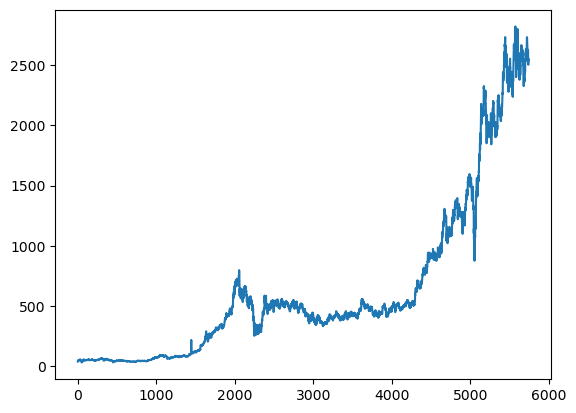

In [15]:
plt.plot(df.Close)

In [16]:
reliance=df.Close.rolling(100).mean()  #moving avg for close column
reliance

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
5740    2554.403516
5741    2554.102014
5742    2553.700015
5743    2553.069514
5744    2552.822515
Name: Close, Length: 5745, dtype: float64

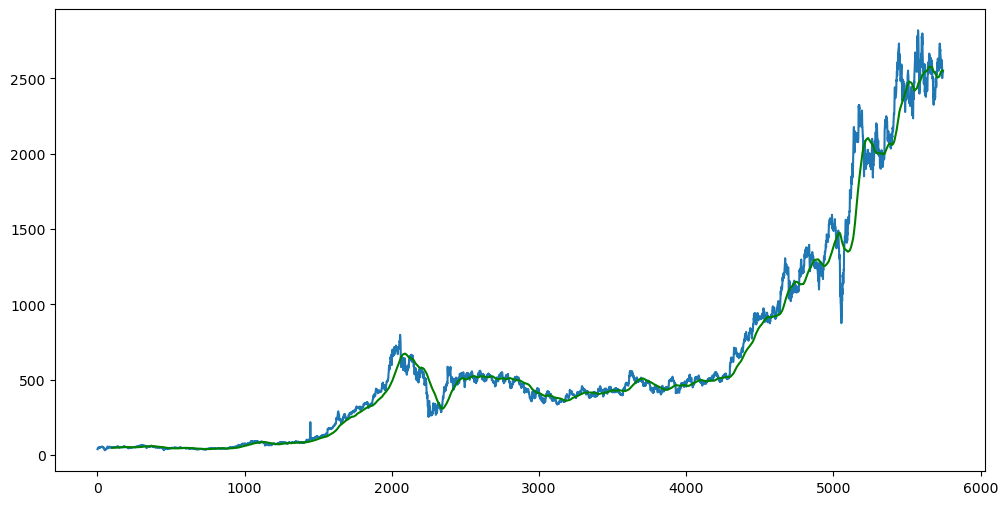

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(reliance,'g')  #g-green colour #graph with 100 moving average

In [18]:
Reliance=df.Close.rolling(200).mean()  #moving avg for close column
Reliance

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
5740    2556.113508
5741    2557.659508
5742    2558.611257
5743    2559.366508
5744    2560.106758
Name: Close, Length: 5745, dtype: float64

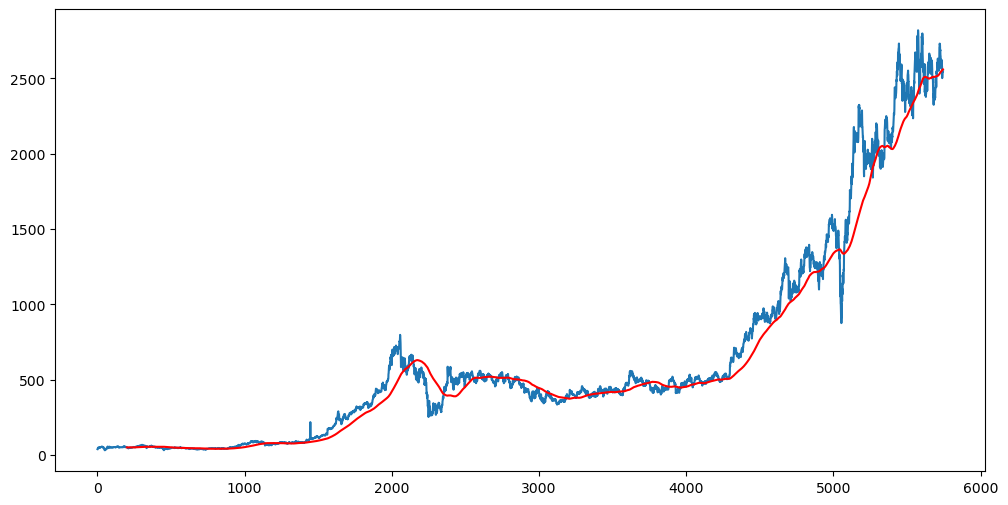

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(Reliance,'r')#r-red colour #graph with 200 moving average


In [20]:
df.shape 

(5745, 2)

In [21]:
# splitting data into training and testing :70% data is training and 30% data is of testing

training= pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
testing=pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(training.shape)
print(testing.shape)

(4021, 1)
(1724, 1)


In [22]:
training.head() 


Close
0  38.944569
1  42.062302
2  43.710136
3  45.543640
4  48.669109

In [23]:
testing.head()

Close
4021  520.862732
4022  517.816589
4023  533.369202
4024  525.840576
4025  531.610840

In [24]:
#lstm model we have to scaled data  between 0 and 1 
# and importing 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [25]:
training_array = scaler.fit_transform(training) #scaled down training data by using minmaxscaler:converteed it into array
training_array # store data in these array

array([[0.00979393],
       [0.01386295],
       [0.01601358],
       ...,
       [0.62621568],
       [0.61396577],
       [0.6220462 ]])

In [26]:
training_array.shape

(4021, 1)

In [27]:
x_train=[]  #empty list 
y_train=[]
#define for loop

for i in range(100,training_array.shape[0]):
    x_train.append(training_array[i-100: i])
    y_train.append(training_array[i, 0])
    
x_train,y_train=np.array(x_train), np.array(y_train)
# so we will not write 4021 we will just write training_array.shape and add 0, because 4021 is at 0 index
# i-100 is basically it should start from 0 and it will go till i
#i- start from i and ,0 because it is only one column
#convert x-train and y_train in numpy array because we can give these data for lstm.





In [29]:
x_train.shape

(3921, 100, 1)

In [28]:
# moving for machine learning model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM


from keras.models import Sequential


In [32]:
# Sequential ml model
model= Sequential()
#start adding layers: than input shape
model.add(LSTM(units=50, activation ='relu', return_sequences=True,
              input_shape = (x_train.shape[1], 1))) #[1] is that 100 is present in 1 index and 1 is no of  column.
model.add(Dropout(0.2))
# 2nd layer
model.add(LSTM(units=60, activation ='relu', return_sequences=True))
             
model.add(Dropout(0.3))
#3rd layer
model.add(LSTM(units=80, activation ='relu', return_sequences=True))
             
model.add(Dropout(0.4))
           
# 4th layer
model.add(LSTM(units=120, activation ='relu'))
             
model.add(Dropout(0.5))      
           
model.add(Dense(units =1 ))              #add dense layer and 1 unit to predict only one value i.e closing price

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [34]:
#compile model
model.compile(optimizer='adam' , loss= 'mean_squared_error')
model.fit(x_train, y_train,epochs = 50)

Epoch 1/50
123/123 [==============================] - 46s 315ms/step - loss: 0.0207
Epoch 2/50
123/123 [==============================] - 39s 315ms/step - loss: 0.0060
Epoch 3/50
123/123 [==============================] - 38s 307ms/step - loss: 0.0050
Epoch 4/50
123/123 [==============================] - 37s 304ms/step - loss: 0.0046
Epoch 5/50
123/123 [==============================] - 36s 290ms/step - loss: 0.0043
Epoch 6/50
123/123 [==============================] - 107s 876ms/step - loss: 0.0039
Epoch 7/50
123/123 [==============================] - 38s 309ms/step - loss: 0.0038
Epoch 8/50
123/123 [==============================] - 38s 309ms/step - loss: 0.0037
Epoch 9/50
123/123 [==============================] - 39s 319ms/step - loss: 0.0039
Epoch 10/50
123/123 [==============================] - 39s 321ms/step - loss: 0.0034
Epoch 11/50
123/123 [==============================] - 39s 318ms/step - loss: 0.0031
Epoch 12/50
123/123 [==============================] - 38s 313ms/step - l

In [35]:
model.save('keras_model.h5')

C:\Users\Sandesh\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
testing.head()

Close
4021  520.862732
4022  517.816589
4023  533.369202
4024  525.840576
4025  531.610840

In [37]:
testing.tail()

Close
5740  2524.050049
5741  2544.699951
5742  2544.449951
5743  2543.300049
5744  2547.199951

In [38]:
#for top record we need past 100 days data training 
#predict value for testing we need record of past days 

past_100_days= testing.tail(100)


In [39]:
final_df =past_100_days.append(testing,ignore_index=True)  #past 100 days data we have append the data

C:\Users\Sandesh\AppData\Local\Temp\ipykernel_15920\4033228653.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df =past_100_days.append(testing,ignore_index=True)  #past 100 days data we have append the data


In [40]:
final_df.head()

Close
0  2534.000000
1  2567.149902
2  2582.500000
3  2591.100098
4  2633.000000

In [41]:
#apply scaling
input_data =scaler.fit_transform(final_df)
input_data

array([[0.87943044],
       [0.89341283],
       [0.8998874 ],
       ...,
       [0.88383815],
       [0.88335313],
       [0.88499809]])

In [42]:
input_data.shape

(1824, 1)

In [43]:
#define test
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

x_test,y_test=np.array(x_test), np.array(y_test)


In [44]:
print(x_test.shape)
print(y_test.shape)

(1724, 100, 1)
(1724,)


In [45]:
#making predictions

y_predicted =model.predict(x_test)

54/54 [==============================] - 2s 34ms/step


In [46]:
y_predicted.shape

(1724, 1)

In [47]:
#print y test
y_test

array([0.03030329, 0.02901845, 0.03557843, ..., 0.88383815, 0.88335313,
       0.88499809])

In [48]:
#[print y predicted
y_predicted

array([[0.76487947],
       [0.74087393],
       [0.7058084 ],
       ...,
       [0.767434  ],
       [0.76531935],
       [0.76459086]], dtype=float32)

In [49]:
#scaled down value conver  into scale up :it gives factor from which value it gone down
scaler.scale_

array([0.00042179])

In [50]:
#divide my y predicted and test value by these factor

scale_factor =1/0.00042179
y_predicted= y_predicted* scale_factor
y_test =y_test* scale_factor

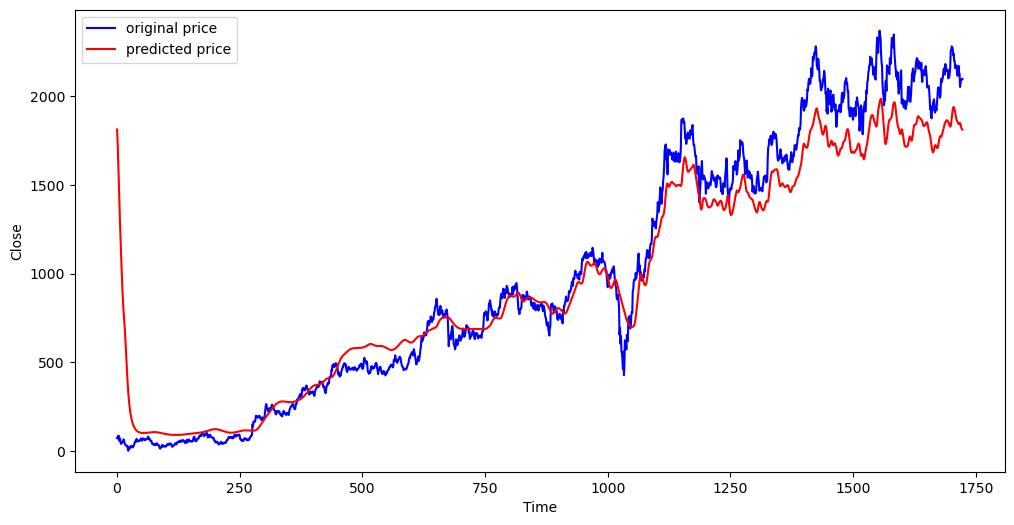

In [52]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' , label ='original price')
plt.plot(y_predicted, 'r',label= 'predicted price')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()
plt.show()